# Importing Training Dataset

In [1288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [1289]:
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Simple EDA

In [1291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1292]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


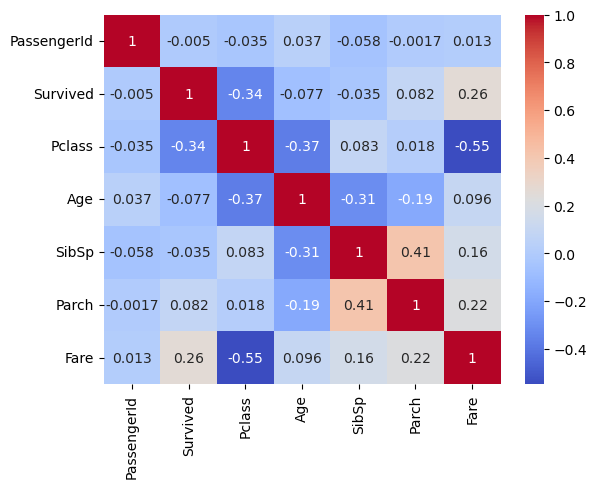

In [1293]:
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm', annot = True)
plt.show()

In [1294]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Preprocessing

In [1296]:
df = df.drop('Cabin', axis=1) #Dropped Cabin column since it majorly had null values

## Imputing missing values

In [1298]:
#Imputing Age column with the mean value of the column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [1299]:
#Imputing Emmbarked column with the value that occured the most
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1300]:
print(df['Sex'].value_counts())
print('\n', df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


## Encoding string values

In [1302]:
#Encoding Sex and Embarked columns
df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
df['Embarked'] = np.where(df['Embarked'] == 'S', 0, np.where(df['Embarked'] == 'C', 1, 2))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


## Splitting into features and target dataframes

In [1304]:
X = df.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket'])
y = df['Survived']
X, y

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.000000      1      0   7.2500         0
 1         1    1  38.000000      1      0  71.2833         1
 2         3    1  26.000000      0      0   7.9250         0
 3         1    1  35.000000      1      0  53.1000         0
 4         3    0  35.000000      0      0   8.0500         0
 ..      ...  ...        ...    ...    ...      ...       ...
 886       2    0  27.000000      0      0  13.0000         0
 887       1    1  19.000000      0      0  30.0000         0
 888       3    1  29.699118      1      2  23.4500         0
 889       1    0  26.000000      0      0  30.0000         1
 890       3    0  32.000000      0      0   7.7500         2
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

# Scaling the features

In [1306]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X, y

(       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
 0    0.827377 -0.737695 -0.592481  0.432793 -0.473674 -0.502445 -0.568837
 1   -1.566107  1.355574  0.638789  0.432793 -0.473674  0.786845  1.005181
 2    0.827377  1.355574 -0.284663 -0.474545 -0.473674 -0.488854 -0.568837
 3   -1.566107  1.355574  0.407926  0.432793 -0.473674  0.420730 -0.568837
 4    0.827377 -0.737695  0.407926 -0.474545 -0.473674 -0.486337 -0.568837
 ..        ...       ...       ...       ...       ...       ...       ...
 886 -0.369365 -0.737695 -0.207709 -0.474545 -0.473674 -0.386671 -0.568837
 887 -1.566107  1.355574 -0.823344 -0.474545 -0.473674 -0.044381 -0.568837
 888  0.827377  1.355574  0.000000  0.432793  2.008933 -0.176263 -0.568837
 889 -1.566107 -0.737695 -0.284663 -0.474545 -0.473674 -0.044381  1.005181
 890  0.827377 -0.737695  0.177063 -0.474545 -0.473674 -0.492378  2.579199
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 88

In [1307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Models
### 1st: Logistic Regression 

In [1309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

X_train_pred = lr_model.predict(X_train)
print(accuracy_score(y_train, X_train_pred))

y_pred_lr = lr_model.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.7963483146067416
0.8379888268156425


              precision    recall  f1-score   support

           0       0.83      0.93      0.87       108
           1       0.86      0.70      0.78        71

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.83       179



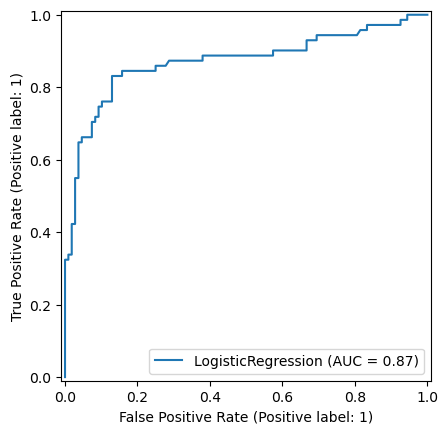

In [1310]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

print(classification_report(y_test, y_pred_lr))
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

In [1311]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X, y, cv=3)
print("Average CV Score:", cv_scores.mean())

Average CV Score: 0.7901234567901234


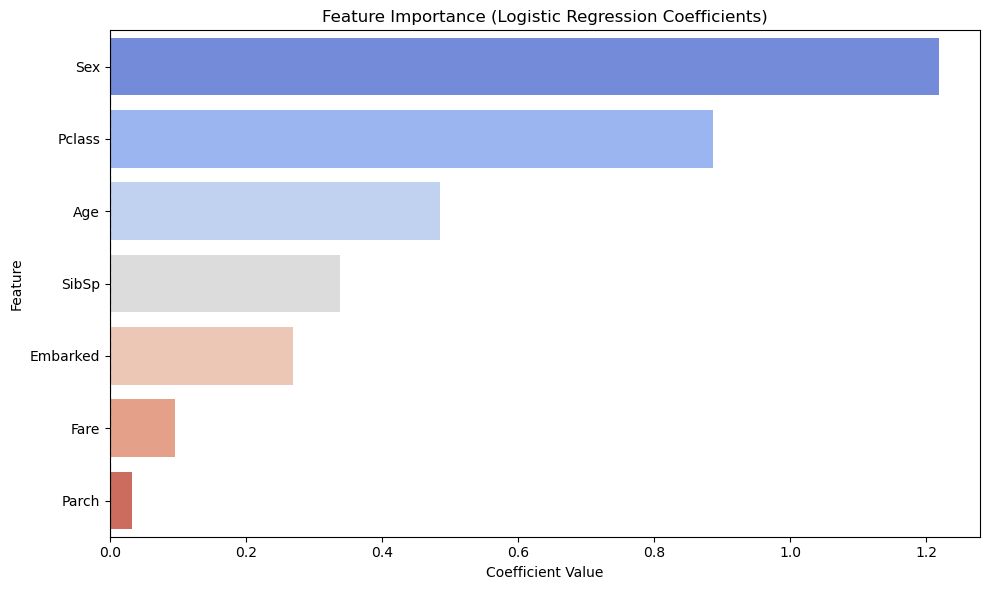

In [1312]:
coefficients = pd.Series(np.abs(lr_model.coef_[0]), index=X_train.columns)
coefficients = coefficients.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, hue = coefficients.index, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

### 2nd Random Forest Classifier

In [1314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {'n_estimators': [10, 100, 200, 500], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [1315]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [1316]:
X_train_pred = final_clf.predict(X_train)
print(accuracy_score(y_train, X_train_pred))

y_pred_clf = final_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_clf))

0.8539325842696629
0.7932960893854749


              precision    recall  f1-score   support

           0       0.76      0.95      0.85       108
           1       0.89      0.55      0.68        71

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179



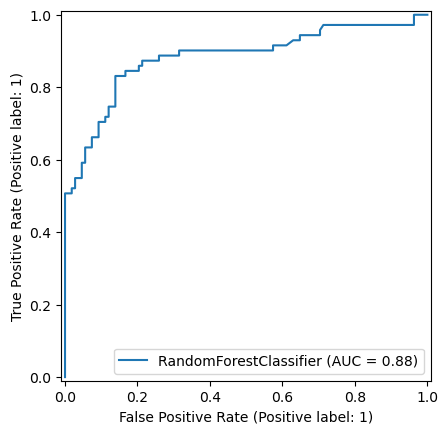

In [1317]:
print(classification_report(y_test, y_pred_clf))
RocCurveDisplay.from_estimator(final_clf, X_test, y_test)

In [1318]:
cv_scores = cross_val_score(final_clf, X, y, cv=3)
print("Average CV Score:", cv_scores.mean())

Average CV Score: 0.819304152637486


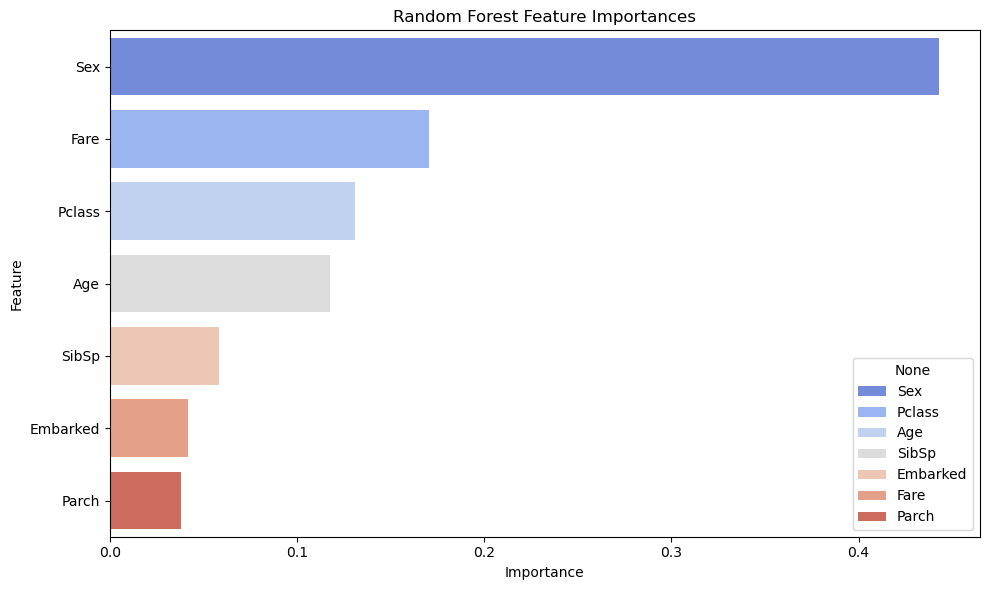

In [1319]:
importances = final_clf.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', hue = coefficients.index, palette='coolwarm')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Test Data Preparation

## Data Reading

In [1322]:
test_data = pd.read_csv('titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Dropping columns that were not used in the training

In [1324]:
submission = test_data['PassengerId'].to_numpy()
test_data = test_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])

In [1325]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

## imputing missing values

In [1327]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Encoding string values

In [1329]:
test_data['Sex'] = np.where(test_data['Sex'] == "male", 0, 1)
test_data['Embarked'] = np.where(test_data['Embarked'] == 'S', 0, np.where(test_data['Embarked'] == 'C', 1, 2))
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


## Scaling the features

In [1331]:
test_data_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(test_data_scaled, columns=test_data.columns, index=test_data.index)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,-0.755929,0.334993,-0.499470,-0.400248,-0.498407,2.243165
1,0.873482,1.322876,1.325530,0.616992,-0.400248,-0.513274,-0.677841
2,-0.315819,-0.755929,2.514175,-0.499470,-0.400248,-0.465088,2.243165
3,0.873482,-0.755929,-0.259330,-0.499470,-0.400248,-0.483466,-0.677841
4,0.873482,1.322876,-0.655545,0.616992,0.619896,-0.418471,-0.677841


## predicting and creating the submission dataframe

In [1333]:
test_data_pred = final_clf.predict(test_data)

In [1334]:
final_submission = pd.DataFrame(np.vstack((submission, test_data_pred)).T, columns=['PassengerId', 'Survived'])
final_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1373]:
final_submission.to_csv('titanic/prediction.csv', index=False)